Kiersten Wener and Eli Chesnut

We will be using the F1-Score. It is the best choice for our dog-vs-cat classification task because it balances precision and recall, making it ideal for scenarios where the dataset might be slightly imbalanced or when both types of errors—falsely classifying a cat as a dog or a dog as a cat—are equally important. While accuracy gives a broad sense of performance, it can be misleading in cases of imbalance. The F1-Score ensures that our model performs well not only in predicting the dominant class but also in identifying the minority class correctly, leading to a more reliable assessment of its real-world performance.

We want to minimize mis-identification, we want to get it right purposefully. This also will help in real world application when there might be an imbalance of testing data.

We will be using sh

In [35]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(pd.__version__)
print(np.__version__)




2.2.3
2.1.3


In [36]:
#path_to_images = '/Users/elichesnut/Documents/GitHub/MLLab6/images'
path_to_images = '/Users/kierstenwener/Downloads/images 2'

images = []
labels = []
dog_breeds = ['american','wheaten','staffordshire','shiba','scottish','samoyed','saint','pug','pomeranian','newfoundland','miniature','leonberger','keeshond','japanese','havanese','great','german','english','chihuahua','boxer','beagle','basset']

for filename in os.listdir(path_to_images):
    if filename.endswith('.jpg'):
        img_path = os.path.join(path_to_images, filename)
        #resize the images
        img = Image.open(img_path).convert('RGB')
        img = img.resize((32, 32))
        images.append(np.array(img))#adds the individual image to the array of images 
        label = filename.split('_')[0] #this gets the breed name 
        #int encode target integer, 0 is dog 1 is cat
        if label in dog_breeds:
            label = 0
        else:
            label = 1
        labels.append(label) #appends the picture label to the label vector 

# combined = list(zip(images, labels))

# Select the first 1000 images and labels to reduce the size of the dataset with a randomized number of each breed
subset_images = images[:1000]
subset_labels = labels[:1000]


X_train, X_test, y_train, y_test = train_test_split(subset_images, subset_labels, test_size=0.2)




We can add a normalization layer to the sequential =

one hot encode and turn to numpy

In [37]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

import numpy as np

# Convert image data lists to NumPy arrays

X_test = np.array(X_test).astype('float32') / 255.0 
X_train = np.array(X_train).astype('float32') / 255.0 


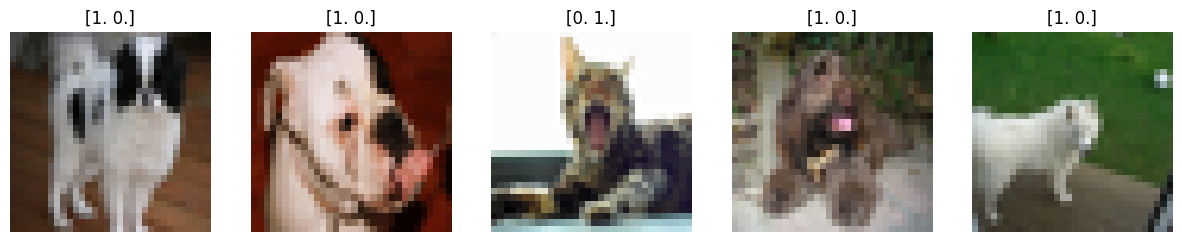

(32, 32, 3)


In [38]:
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(1, 5, i + 1)  
    plt.title(y_train[i])
    plt.imshow(X_train[i]) 
    plt.axis('off')  

plt.show()  # 
print(subset_images[0].shape)

In [39]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline
labels = ['Dog', 'Cat']
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    y_test_single = np.argmax(y_test, axis=1)


    acc = mt.accuracy_score(y_test_single,yhat)
    cm = mt.confusion_matrix(y_test_single,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))

In [40]:

import setuptools.dist
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model


#start with alexnet convolutional phase
# cnn = Sequential(name='3x3_kernel')
# cnn.add( Conv2D(filters=16, kernel_size= (3,3), padding='same', input_shape=(32,32,3)))

cnn = Sequential()
cnn.add(Conv2D(filters=32,
                input_shape = (32,32,3),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(2, activation='softmax'))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])


/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
cnn.fit(X_train, y_train, batch_size=32, 
                   epochs=5, verbose=1,
                   validation_data=(X_test,y_test)
                  )

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5480 - loss: 1.0783 - val_accuracy: 0.6900 - val_loss: 0.6175
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6310 - loss: 0.6536 - val_accuracy: 0.6900 - val_loss: 0.6056
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6413 - loss: 0.6286 - val_accuracy: 0.6700 - val_loss: 0.6125
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6988 - loss: 0.6001 - val_accuracy: 0.6400 - val_loss: 0.6133
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7208 - loss: 0.5513 - val_accuracy: 0.6550 - val_loss: 0.6189


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


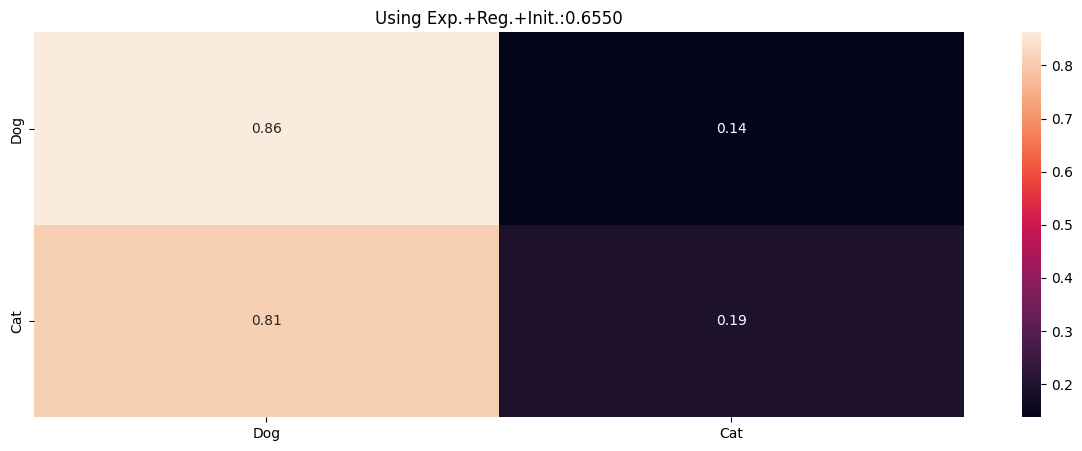

In [42]:
summarize_net(cnn, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,         # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,     # Randomly translate images horizontally
    height_shift_range=0.2,    # Randomly translate images vertically
    shear_range=0.15,          # Shear transformations
    zoom_range=0.15,           # Zoom in or out on images
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest',       # Fill in missing pixels after transformations
    rescale=1./255             # Normalize pixel values to [0, 1]
)

In [47]:

import setuptools.dist
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model


#start with alexnet convolutional phase
# cnn = Sequential(name='3x3_kernel')
# cnn.add( Conv2D(filters=16, kernel_size= (3,3), padding='same', input_shape=(32,32,3)))

cnn2 = Sequential()
cnn2.add(Conv2D(filters=32,
                input_shape = (32,32,3),
                kernel_size=(4,4), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn2.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn2.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn2.add(Flatten())
cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn2.add(Dense(2, activation='softmax'))

# Let's train the model 
cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])


/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
cnn2.fit(X_train, y_train, batch_size=32, 
                   epochs=15, verbose=1,
                   validation_data=(X_test,y_test)
                  )

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5510 - loss: 0.9502 - val_accuracy: 0.6900 - val_loss: 0.6303
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6268 - loss: 0.6434 - val_accuracy: 0.6700 - val_loss: 0.6392
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6878 - loss: 0.6241 - val_accuracy: 0.6900 - val_loss: 0.6020
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6834 - loss: 0.5906 - val_accuracy: 0.6300 - val_loss: 0.6246
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6881 - loss: 0.5819 - val_accuracy: 0.6550 - val_loss: 0.6032
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7456 - loss: 0.5025 - val_accuracy: 0.6750 - val_loss: 0.5873
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8068 - loss: 0.4533 - val_accuracy: 0.6650 - val_loss: 0.6670
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8067 - loss: 0.4237 - val_accuracy: 0.6750 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


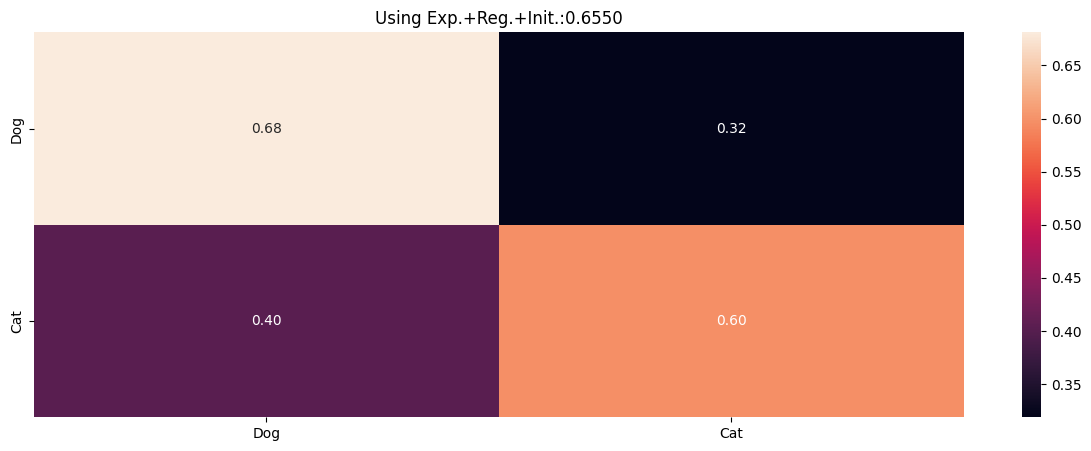

In [53]:
summarize_net(cnn2, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

In [57]:
# what if we just want to use the validation data??
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 
l2_lambda = 0.0001

# Use Kaiming He to regularize ReLU layers: https://arxiv.org/pdf/1502.01852.pdf
# Use Glorot/Bengio for linear/sigmoid/softmax: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf 
cnn = Sequential()

cnn.add(Conv2D(filters=32,
               input_shape = (32, 32, 3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',
               data_format="channels_last")) # more compact syntax

cnn.add(Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn.add(Conv2D(filters=64,
               input_shape = (32,32,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last")) # more compact syntax

cnn.add(Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn.add(Conv2D(filters=128,
               input_shape = (32,32,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last")) # more compact syntax

cnn.add(Conv2D(filters=128,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
    

# add one layer on flattened output

cnn.add(Flatten())
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Dense(128, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
       ))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(2, 
              activation='sigmoid', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             ))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations


In [64]:


cnn.fit(X_train, y_train, batch_size=32, 
                   epochs=15, verbose=1,
                   validation_data=(X_test,y_test)
                  )

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6098 - loss: 0.8120 - val_accuracy: 0.6900 - val_loss: 0.7322
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6331 - loss: 0.7639 - val_accuracy: 0.6900 - val_loss: 0.7464
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6409 - loss: 0.7497 - val_accuracy: 0.6900 - val_loss: 0.6876
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6135 - loss: 0.7605 - val_accuracy: 0.6700 - val_loss: 0.7081
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6645 - loss: 0.6942 - val_accuracy: 0.6550 - val_loss: 0.6801
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6596 - loss: 0.6557 - val_accuracy: 0.6400 - val_loss: 0.6887
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7223 - loss: 0.6491 - val_accuracy: 0.6450 - val_loss: 0.6825
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7132 - loss: 0.6121 - val_accuracy: 0.6150 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


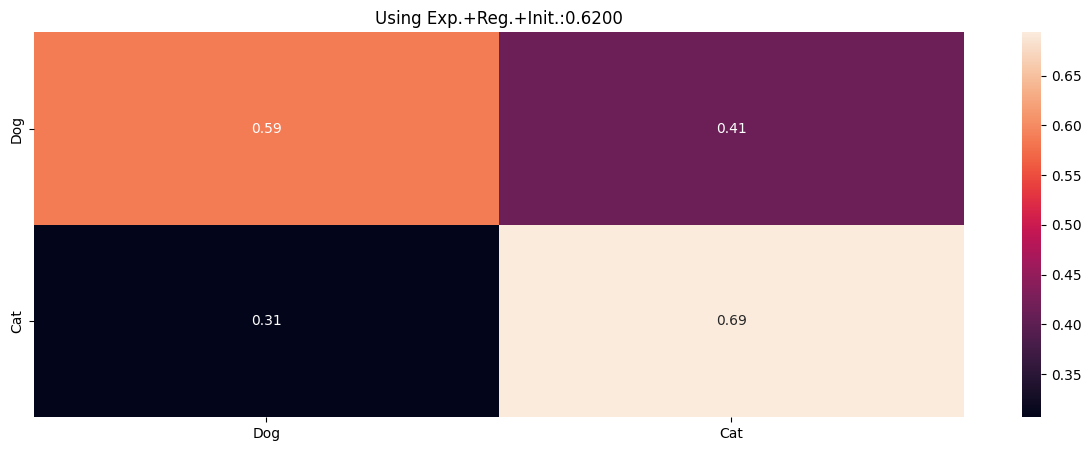

In [65]:
summarize_net(cnn2, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')